# 1.Setup

A configuração de setup é o processo de preparar e organizar o ambiente para uso. Envolvendo a instalação de bibliotecas e configuração de outros ajustes necessários. O objetivo é criar um ambiente funcional para executar tarefas específicas.

## 1.1.Conexão com drive

Para realizar a análise, padronização e manipulação dos dados é necessário selecionar a base de dados desejada. Neste documento a importação da mesma será feita através do Google Drive e o arquivo está em formato excel (csv).

In [1]:
#Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import pandas
import sklearn

In [3]:
inventario = pd.read_csv('/content/drive/MyDrive/T4M8G2/DADOS/Dados CSV/inventario.csv', delimiter=',')

In [4]:
inventario

,UF,ESTRATO_POF,TIPO_SITUACAO_REG,COD_UPA,NUM_DOM,NUM_UC,QUADRO,SEQ,V9001,V9005,V9002,V1404,V9012,PESO,PESO_FINAL,RENDA_TOTAL
0,11,1103,1,110005400,1,1,14,0,1400101,1,1,2012,1,272.806669,372.984516,11254.75
1,11,1103,1,110005400,1,1,14,3,1400401,1,3,2009,1,272.806669,372.984516,11254.75
2,11,1103,1,110005400,1,1,14,4,1400501,2,1,2005,1,272.806669,372.984516,11254.75
3,11,1103,1,110005400,1,1,14,5,1400601,1,1,2010,1,272.806669,372.984516,11254.75
4,11,1103,1,110005400,1,1,14,8,1400901,1,1,2011,1,272.806669,372.984516,11254.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870349,53,5306,1,530025746,13,1,14,26,1402701,14,1,2015,1,506.403820,620.212733,257432.45
870350,53,5306,1,530025746,13,1,14,27,1402801,4,1,2015,1,506.403820,620.212733,257432.45
870351,53,5306,1,530025746,13,1,14,28,1402901,2,1,2015,1,506.403820,620.212733,257432.45
870352,53,5306,1,530025746,13,1,14,29,1403001,4,3,2017,1,506.403820,620.212733,257432.45


In [5]:
inventario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870354 entries, 0 to 870353
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   UF                 870354 non-null  int64  
 1   ESTRATO_POF        870354 non-null  int64  
 2   TIPO_SITUACAO_REG  870354 non-null  int64  
 3   COD_UPA            870354 non-null  int64  
 4   NUM_DOM            870354 non-null  int64  
 5   NUM_UC             870354 non-null  int64  
 6   QUADRO             870354 non-null  int64  
 7   SEQ                870354 non-null  int64  
 8   V9001              870354 non-null  int64  
 9   V9005              870354 non-null  int64  
 10  V9002              870354 non-null  int64  
 11  V1404              870354 non-null  int64  
 12  V9012              870354 non-null  int64  
 13  PESO               870354 non-null  float64
 14  PESO_FINAL         870354 non-null  float64
 15  RENDA_TOTAL        870354 non-null  float64
dtypes:

In [6]:
inventario['UF'] = inventario['UF'].replace({11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17:'Tocantins', 21:'Maranhão', 22:'Piauí', 23:'Ceará', 24:'Rio Grande do Norte', 25:'Paraíba', 26:'Pernambuco', 27:'Alagoas', 28:'Sergipe', 29:'Bahia', 31:'Minas Gerais', 32:'Espírito Santo', 33:"Rio de Janeiro", 35:'São Paulo', 41:'Paraná', 42:'Santa Catarina', 43:'Rio Grande do Sul', 50:'Mato Grosso do Sul', 51:'Mato Grosso', 52: 'Goiás', 53:'Distrito Federal'})

inventario

,UF,ESTRATO_POF,TIPO_SITUACAO_REG,COD_UPA,NUM_DOM,NUM_UC,QUADRO,SEQ,V9001,V9005,V9002,V1404,V9012,PESO,PESO_FINAL,RENDA_TOTAL
0,Rondônia,1103,1,110005400,1,1,14,0,1400101,1,1,2012,1,272.806669,372.984516,11254.75
1,Rondônia,1103,1,110005400,1,1,14,3,1400401,1,3,2009,1,272.806669,372.984516,11254.75
2,Rondônia,1103,1,110005400,1,1,14,4,1400501,2,1,2005,1,272.806669,372.984516,11254.75
3,Rondônia,1103,1,110005400,1,1,14,5,1400601,1,1,2010,1,272.806669,372.984516,11254.75
4,Rondônia,1103,1,110005400,1,1,14,8,1400901,1,1,2011,1,272.806669,372.984516,11254.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870349,Distrito Federal,5306,1,530025746,13,1,14,26,1402701,14,1,2015,1,506.403820,620.212733,257432.45
870350,Distrito Federal,5306,1,530025746,13,1,14,27,1402801,4,1,2015,1,506.403820,620.212733,257432.45
870351,Distrito Federal,5306,1,530025746,13,1,14,28,1402901,2,1,2015,1,506.403820,620.212733,257432.45
870352,Distrito Federal,5306,1,530025746,13,1,14,29,1403001,4,3,2017,1,506.403820,620.212733,257432.45


In [7]:
inventario['TIPO_SITUACAO_REG'] = inventario['TIPO_SITUACAO_REG'].replace({1: 'Urbano', 2: 'Rural'})

inventario

,UF,ESTRATO_POF,TIPO_SITUACAO_REG,COD_UPA,NUM_DOM,NUM_UC,QUADRO,SEQ,V9001,V9005,V9002,V1404,V9012,PESO,PESO_FINAL,RENDA_TOTAL
0,Rondônia,1103,Urbano,110005400,1,1,14,0,1400101,1,1,2012,1,272.806669,372.984516,11254.75
1,Rondônia,1103,Urbano,110005400,1,1,14,3,1400401,1,3,2009,1,272.806669,372.984516,11254.75
2,Rondônia,1103,Urbano,110005400,1,1,14,4,1400501,2,1,2005,1,272.806669,372.984516,11254.75
3,Rondônia,1103,Urbano,110005400,1,1,14,5,1400601,1,1,2010,1,272.806669,372.984516,11254.75
4,Rondônia,1103,Urbano,110005400,1,1,14,8,1400901,1,1,2011,1,272.806669,372.984516,11254.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870349,Distrito Federal,5306,Urbano,530025746,13,1,14,26,1402701,14,1,2015,1,506.403820,620.212733,257432.45
870350,Distrito Federal,5306,Urbano,530025746,13,1,14,27,1402801,4,1,2015,1,506.403820,620.212733,257432.45
870351,Distrito Federal,5306,Urbano,530025746,13,1,14,28,1402901,2,1,2015,1,506.403820,620.212733,257432.45
870352,Distrito Federal,5306,Urbano,530025746,13,1,14,29,1403001,4,3,2017,1,506.403820,620.212733,257432.45


In [8]:
inventario['V9002'] = inventario['V9002'].replace({1: 'Monetária à vista para a Unidade de Consumo', 2: 'Monetária à vista para outra Unidade de Consumo', 3:'Monetária a prazo para a Unidade de Consumo', 4:'Monetária a prazo para outra Unidade de Consumo', 5:'Cartão de crédito à vista para a Unidade de Consumo', 6:'Cartão de crédito à vista para outra Unidade de Consumo', 7:'Doação', 8:'Retirada do Negócio', 9:'Troca', 10:'Produção Própria', 11:'Outra'})

inventario

,UF,ESTRATO_POF,TIPO_SITUACAO_REG,COD_UPA,NUM_DOM,NUM_UC,QUADRO,SEQ,V9001,V9005,V9002,V1404,V9012,PESO,PESO_FINAL,RENDA_TOTAL
0,Rondônia,1103,Urbano,110005400,1,1,14,0,1400101,1,Monetária à vista para a Unidade de Consumo,2012,1,272.806669,372.984516,11254.75
1,Rondônia,1103,Urbano,110005400,1,1,14,3,1400401,1,Monetária a prazo para a Unidade de Consumo,2009,1,272.806669,372.984516,11254.75
2,Rondônia,1103,Urbano,110005400,1,1,14,4,1400501,2,Monetária à vista para a Unidade de Consumo,2005,1,272.806669,372.984516,11254.75
3,Rondônia,1103,Urbano,110005400,1,1,14,5,1400601,1,Monetária à vista para a Unidade de Consumo,2010,1,272.806669,372.984516,11254.75
4,Rondônia,1103,Urbano,110005400,1,1,14,8,1400901,1,Monetária à vista para a Unidade de Consumo,2011,1,272.806669,372.984516,11254.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870349,Distrito Federal,5306,Urbano,530025746,13,1,14,26,1402701,14,Monetária à vista para a Unidade de Consumo,2015,1,506.403820,620.212733,257432.45
870350,Distrito Federal,5306,Urbano,530025746,13,1,14,27,1402801,4,Monetária à vista para a Unidade de Consumo,2015,1,506.403820,620.212733,257432.45
870351,Distrito Federal,5306,Urbano,530025746,13,1,14,28,1402901,2,Monetária à vista para a Unidade de Consumo,2015,1,506.403820,620.212733,257432.45
870352,Distrito Federal,5306,Urbano,530025746,13,1,14,29,1403001,4,Monetária a prazo para a Unidade de Consumo,2017,1,506.403820,620.212733,257432.45


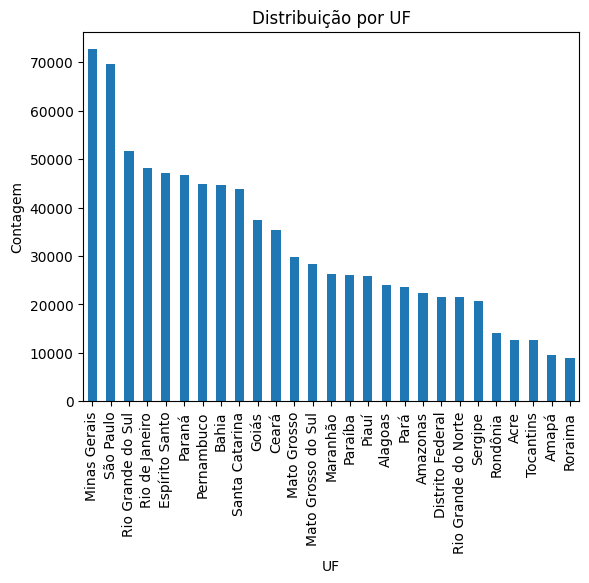

In [9]:
inventario['UF'].value_counts().plot(kind='bar')
plt.title("Distribuição por UF")
plt.xlabel("UF")
plt.ylabel("Contagem")
plt.show()

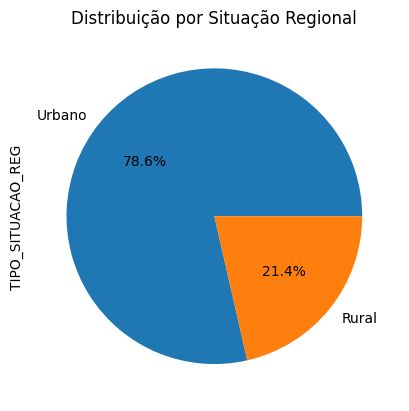

In [16]:
inventario['TIPO_SITUACAO_REG'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribuição por Situação Regional")
plt.show()

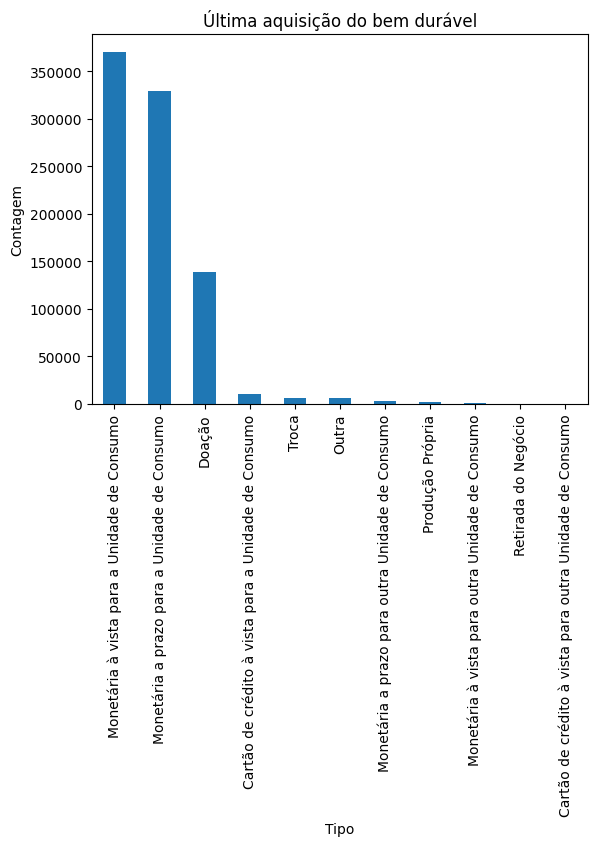

In [12]:
inventario['V9002'].value_counts().plot(kind='bar')
plt.title("Última aquisição do bem durável")
plt.xlabel("Tipo")
plt.ylabel("Contagem")
plt.show()